In [ ]:
!mkdir data

# download data

In [ ]:
!wget -P data/ https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data
!wget -P data/ https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data
!wget -P data/ https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data
!wget -P data/ https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data

# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# load datasets
cl = pd.read_csv("data/processed.cleveland.data")
hn = pd.read_csv("data/processed.hungarian.data")
sw = pd.read_csv("data/processed.switzerland.data")
va = pd.read_csv("data/processed.va.data")

In [2]:
classes = ['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
           'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

classes_to_drop = ['exang', 'oldpeak', 'slope', 'ca', 'thal']

cl.columns = classes
hn.columns = classes
sw.columns = classes
va.columns = classes

for i in classes_to_drop:
    cl.drop(i, inplace=True, axis=1)
    hn.drop(i, inplace=True, axis=1)
    sw.drop(i, inplace=True, axis=1)
    va.drop(i, inplace=True, axis=1)

In [3]:
age = []
gender = [] 
cp = []
trestbps =[] 
chol = []
fbs = []
restecg =[]
thalach = []
target =[] 

In [6]:
# concatenate the columns of 4 datasets into single columns

age = [cl['age'].tolist(), hn['age'].tolist(), sw['age'].tolist(), va['age'].tolist()]
gender = [cl['gender'].tolist(), hn['gender'].tolist(), sw['gender'].tolist(), va['gender'].tolist()]
cp = [cl['cp'].tolist(), hn['cp'].tolist(), sw['cp'].tolist(), va['cp'].tolist()]
trestbps = [cl['trestbps'].tolist(), hn['trestbps'].tolist(), sw['trestbps'].tolist(), va['trestbps'].tolist()]
chol = [cl['chol'].tolist(), hn['chol'].tolist(), sw['chol'].tolist(), va['chol'].tolist()]
fbs = [cl['fbs'].tolist(), hn['fbs'].tolist(), sw['fbs'].tolist(), va['fbs'].tolist()]
restecg = [cl['restecg'].tolist(), hn['restecg'].tolist(), sw['restecg'].tolist(), va['restecg'].tolist()]
thalach = [cl['thalach'].tolist(), hn['thalach'].tolist(), sw['thalach'].tolist(), va['thalach'].tolist()]
target = [cl['target'].tolist(), hn['target'].tolist(), sw['target'].tolist(), va['target'].tolist()]

In [7]:
# creating the data pipeline
data = pd.DataFrame({"age": age[0]+age[1]+age[2]+age[3],
                    "gender": gender[0]+gender[1]+gender[2]+gender[3], 
                    "cp": cp[0]+cp[1]+cp[2]+cp[3],
                     "trestbps": trestbps[0]+trestbps[1]+trestbps[2]+trestbps[3],
                     'chol': chol[0]+chol[1]+chol[2]+chol[3],
                     'fbs': fbs[0]+fbs[1]+fbs[2]+fbs[3],
                     'restecg': restecg[0]+restecg[1]+restecg[2]+restecg[3],
                     'thalach': thalach[0]+thalach[1]+thalach[2]+thalach[3],
                     'target': target[0]+target[1]+target[2]+target[3],
                     })


In [8]:
# minor preprocessing, replacing Null values
data = data.replace(to_replace ="?",
                 value = -1)

# transforming multi-class dataset into binary classification dataset
data['target'] = data['target'].replace([2, 3, 4],1)

# replacing empty cholestroel values with normal cholestroel level
data['chol'] = data['chol'].replace([0,0], 200)

In [9]:
# rescalling the data
#min_max_scaler = MinMaxScaler()
#data[['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach']] = min_max_scaler.fit_transform(data[['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach']])

In [ ]:
data.shape

In [11]:
data

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,target
0,67.0,1.0,4.0,160,286,0,2,108,1
1,67.0,1.0,4.0,120,229,0,2,129,1
2,37.0,1.0,3.0,130,250,0,0,187,0
3,41.0,0.0,2.0,130,204,0,2,172,0
4,56.0,1.0,2.0,120,236,0,0,178,0
...,...,...,...,...,...,...,...,...,...
911,54.0,0.0,4.0,127,333,1,1,154,1
912,62.0,1.0,1.0,-1,139,0,1,-1,0
913,55.0,1.0,4.0,122,223,1,1,100,1
914,58.0,1.0,4.0,-1,385,1,2,-1,0


# Building the Model

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib import rcParams


import pickle

In [14]:
x = data.drop(['target'], axis = 1)
y = data['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

Text(0.5, 1.0, 'Visualizing classes')

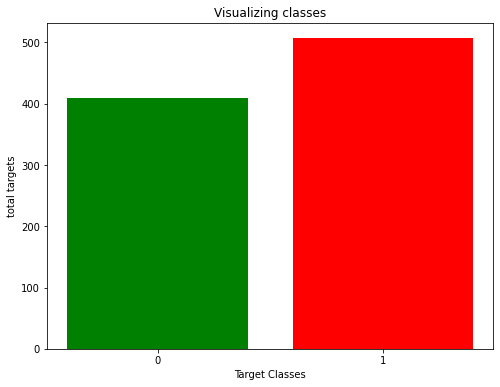

In [12]:
# visualizing the classes
rcParams['figure.figsize'] = 8,6
plt.bar(data['target'].unique(), data['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('total targets')
plt.title('Visualizing classes')

In [15]:
# getting scores from training on different K values
scores = []
for i in range(1,21):
    mod_iter = KNeighborsClassifier(n_neighbors = i)
    mod_iter.fit(x_train, y_train)
    scores.append(mod_iter.score(x_test, y_test))
print(scores)

[0.5760869565217391, 0.532608695652174, 0.5978260869565217, 0.5869565217391305, 0.6630434782608695, 0.6086956521739131, 0.6847826086956522, 0.6630434782608695, 0.6630434782608695, 0.6195652173913043, 0.6956521739130435, 0.6739130434782609, 0.6739130434782609, 0.6630434782608695, 0.6739130434782609, 0.6304347826086957, 0.6630434782608695, 0.6413043478260869, 0.6847826086956522, 0.7065217391304348]


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

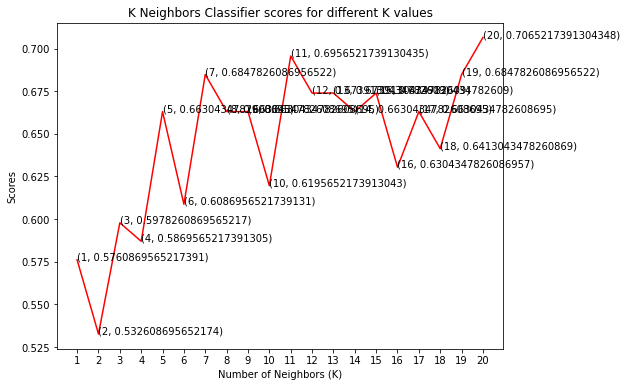

In [16]:
# plotting the scores obtained by training on different k values
plt.plot([k for k in range(1, 21)], scores, color = 'red')
for i in range(1,21):
    plt.text(i, scores[i-1], (i, scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [47]:
# final model buildup
model = KNeighborsClassifier(n_neighbors = 20)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.7065217391304348

ValueError: query data dimension must match training data dimension

In [49]:
# testing

pred = np.array([70, 1, 4, 115, 0, 0, 1, 92]) # ground truth = 1
p = pred.reshape(-1, 1)
p = p.reshape(1, 8)


history = model.predict(p)
print(history)

[1]


In [ ]:
#save the model
pickle.dump(model, open('saved/model', 'wb'))

# Run the code below if you already have a saved model

In [ ]:
import pickle
import numpy as np

model = pickle.load(open('saved/model', 'rb'))


In [21]:
pred = np.array([70, 1, 4, 115, 0, 0, 1, 92]) # ground truth = 1
p = pred.reshape(-1, 1)
p = p.reshape(1, 8)



history = model.predict(p)
print(history)

[1]


In [56]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)
print(clf.score(x_test, y_test))

y_pred=clf.predict(x_test)
print("pred", "ground truth")
for i in range(len(y_pred[:20])):
    print(y_pred[:20][i], " = ", y_test.tolist()[:20][i])

0.782608695652174
pred ground truth
0  =  0
1  =  1
0  =  1
0  =  1
1  =  1
0  =  0
0  =  1
0  =  0
0  =  0
0  =  0
1  =  1
1  =  1
1  =  1
0  =  0
1  =  1
1  =  1
1  =  1
0  =  0
1  =  1
1  =  1


In [57]:
pickle.dump(clf, open('saved/model', 'wb'))